In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(25,'e2cbfc10a4d075e8322ad281d2b58cc856715d0389e9f65ce269aa8c')

In [2]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('./data/C2A2_data/BinnedCsvs_d400/ed157460d30113a689e487b88dcbef1f5d64cbd8bb7825f5f485013d.csv')
data.head()

,ID,Date,Element,Data_Value
0,USW00003904,2005-10-05,TMIN,228
1,USC00418446,2007-05-31,TMIN,200
2,USC00419491,2006-07-16,TMAX,361
3,USC00418646,2010-11-09,TMAX,239
4,USC00418446,2007-05-31,TMAX,317


In [3]:
len(data)

33752

In [4]:
data['Year'], data['Month'] = zip(*data['Date'].apply(lambda x: (x[:4], x[5:])))
data.head()

,ID,Date,Element,Data_Value,Year,Month
0,USW00003904,2005-10-05,TMIN,228,2005,10-05
1,USC00418446,2007-05-31,TMIN,200,2007,05-31
2,USC00419491,2006-07-16,TMAX,361,2006,07-16
3,USC00418646,2010-11-09,TMAX,239,2010,11-09
4,USC00418446,2007-05-31,TMAX,317,2007,05-31


In [5]:
data.sort_values(['ID','Date']).head()

,ID,Date,Element,Data_Value,Year,Month
22037,USC00411348,2005-01-01,TMIN,156,2005,01-01
22038,USC00411348,2005-01-01,TMAX,233,2005,01-01
21435,USC00411348,2005-01-02,TMAX,222,2005,01-02
21436,USC00411348,2005-01-02,TMIN,161,2005,01-02
5413,USC00411348,2005-01-03,TMIN,178,2005,01-03


In [6]:
data.drop(data.loc[data['Month']=='02-29'].index, inplace=True)

In [7]:
data.head()

,ID,Date,Element,Data_Value,Year,Month
0,USW00003904,2005-10-05,TMIN,228,2005,10-05
1,USC00418446,2007-05-31,TMIN,200,2007,05-31
2,USC00419491,2006-07-16,TMAX,361,2006,07-16
3,USC00418646,2010-11-09,TMAX,239,2010,11-09
4,USC00418446,2007-05-31,TMAX,317,2007,05-31


In [8]:
len(data)

33735

In [9]:
Maximum_temperature = data[(data['Element'] == 'TMIN') & (data['Year'] != '2015')].groupby(by = 'Month')["Data_Value"].agg([np.max]) 
Maximum_temperature.head()                                                        


,amax
Month,
01-01,178
01-02,194
01-03,206
01-04,194
01-05,183


In [10]:
Minimum_temperature= data[(data['Element'] == 'TMIN') & (data['Year'] != '2015')].groupby(by = 'Month')["Data_Value"].agg([np.min])
Minimum_temperature.head()

,amin
Month,
01-01,-72
01-02,-72
01-03,-67
01-04,-67
01-05,-83


In [11]:
Maximum_temperature_in_2015= data[(data['Element'] == 'TMIN') & (data['Year'] == '2015')].groupby(by = 'Month')["Data_Value"].agg([np.max])
Maximum_temperature_in_2015.head()

,amax
Month,
01-01,28
01-02,50
01-03,56
01-04,22
01-05,-16


In [12]:
Minimum_temperature_in_2015= data[(data['Element'] == 'TMIN') & (data['Year'] == '2015')].groupby(by = 'Month')["Data_Value"].agg([np.min])
Minimum_temperature_in_2015.head()

,amin
Month,
01-01,0
01-02,0
01-03,-33
01-04,-11
01-05,-44


In [13]:
Broken_Maximum = np.where(Maximum_temperature_in_2015['amax'] > Maximum_temperature['amax'])[0]
Broken_Maximum

array([ 98, 129, 172, 211, 236, 249, 263, 295, 296, 303, 308, 314, 319,
       329, 343, 344, 345, 357, 358, 359, 360])

In [14]:
Broken_Minimum = np.where(Minimum_temperature_in_2015['amin'] < Minimum_temperature['amin'])[0]
Broken_Minimum

array([ 64,  65, 223, 226, 227, 228, 256, 257])

In [15]:
Broken_Maximum,Broken_Minimum

(array([ 98, 129, 172, 211, 236, 249, 263, 295, 296, 303, 308, 314, 319,
        329, 343, 344, 345, 357, 358, 359, 360]),
 array([ 64,  65, 223, 226, 227, 228, 256, 257]))

<IPython.core.display.Javascript object>


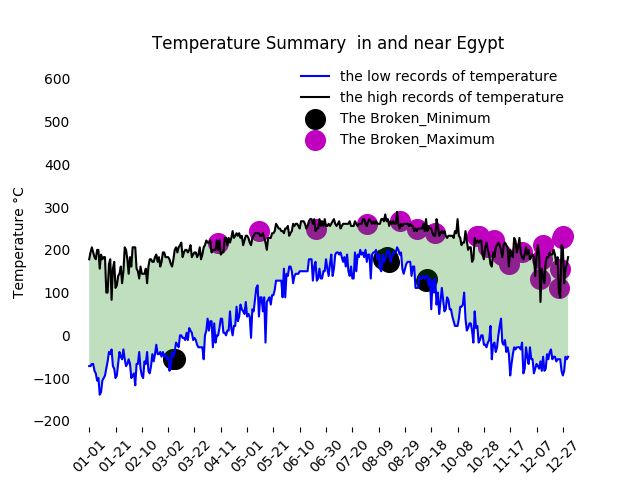

In [16]:
plt.figure()
plt.plot(Minimum_temperature.values,'b',label='the low records of temperature')
plt.plot(Maximum_temperature.values,'black',label='the high records of temperature')
plt.scatter(Broken_Minimum,Minimum_temperature_in_2015.iloc[Broken_Minimum],s=200, c='black', label='The Broken_Minimum')
plt.scatter(Broken_Maximum,Maximum_temperature_in_2015.iloc[Broken_Maximum],s=200, c='m', label='The Broken_Maximum')
plt.gca().fill_between(range(len(Minimum_temperature)),
                             Minimum_temperature['amin'],Maximum_temperature['amax'],
                             facecolor='g',
                             alpha=0.25)
plt.xticks(range(0, len(Minimum_temperature), 20), Minimum_temperature.index[range(0, len(Minimum_temperature), 20)], rotation = '45')
plt.gca().axis([-7, 370, -215, 650])
plt.xlabel('year days')
plt.ylabel('Temperature °C')
plt.title('Temperature Summary  in and near Egypt')
plt.legend(loc = 0, frameon = False)
plt.tick_params(top=False, bottom=True, left=False, right=False, labelleft=True, labelbottom=True)
for spine in plt.gca().spines.values():
    spine.set_visible(False)